In [ ]:
import zipfile
import os
# https://github.com/city292/build_assessment/archive/refs/heads/master.zip

In [ ]:

!wget --no-check-certificate \
    "https://github.com/city292/build_assessment/archive/refs/heads/master.zip" \
    -O "/tmp/building-data.zip"


zip_ref = zipfile.ZipFile('/tmp/building-data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2023-04-25 04:36:14--  https://github.com/city292/build_assessment/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/city292/build_assessment/zip/refs/heads/master [following]
--2023-04-25 04:36:15--  https://codeload.github.com/city292/build_assessment/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281331192 (268M) [application/zip]
Saving to: ‘/tmp/building-data.zip’

/tmp/building-data. 100%[===================>] 268.30M  46.3MB/s    in 6.2s    

2023-04-25 04:36:21 (43.3 MB/s) - ‘/tmp/building-data.zip’ saved [281331192/281331192]



In [ ]:
print('Test set buildings' , len(os.listdir('/tmp/build_assessment-master/data/train/0')))

Test set buildings 2038


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os
path0 = '/tmp/build_assessment-master/data/train/0'
path1 = '/tmp/build_assessment-master/data/train/1'
path2 = '/tmp/build_assessment-master/data/train/2'
path3 = '/tmp/build_assessment-master/data/train/3'
data0 = []
data1 = []
data2 = []
data3 = []

def load_data(ls, path):
  for filename in os.listdir(path):
    if filename.endswith(".tif"):
      img_path = os.path.join(path, filename)
      img = Image.open(img_path).convert('L')
      img_data = np.array(img.resize((88, 88)))
      # ls.append(img_data.flatten())
      ls.append(img_data)
# df = pd.DataFrame(data)

In [ ]:
load_data(data0, path0)
load_data(data1, path1)
load_data(data2, path2)
load_data(data3, path3)

In [ ]:
import matplotlib.pyplot as plt

np_result = np.concatenate((data0, data1, data2, data3), axis=0)
class_list = [0 for i in range(len(data0))] + [1 for i in range(len(data1))] + [2 for i in range(len(data2))] + [3 for i in range(len(data3))]
np_result = np_result/255.0
final_df = pd.DataFrame()
final_df['img'] = list(np_result)
final_df['class'] = class_list
final_df.value_counts('class')
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [ ]:
final_df
final_df.value_counts('class')

class
1    3843
3    2436
2    2107
0    2038
dtype: int64

In [ ]:
testpath0 = '/tmp/build_assessment-master/data/yushu/0'
testpath1 = '/tmp/build_assessment-master/data/yushu/1'
testpath2 = '/tmp/build_assessment-master/data/yushu/2'
testpath3 = '/tmp/build_assessment-master/data/yushu/3'
testdata0 = []
testdata1 = []
testdata2 = []
testdata3 = []
load_data(testdata0, testpath0)
load_data(testdata1, testpath1)
load_data(testdata2, testpath2)
load_data(testdata3, testpath3)

np_test = np.concatenate((testdata0, testdata1, testdata2, testdata3), axis=0)
test_list = [0 for i in range(len(testdata0))] + [1 for i in range(len(testdata1))] + [2 for i in range(len(testdata2))] + [3 for i in range(len(testdata3))]
np_test = np_test/255.0
test_df = pd.DataFrame()
test_df['img'] = list(np_test)
test_df['class'] = test_list
test_df.value_counts('class')
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
X_test = np.array(test_df['img'].tolist())
y_test = np.array(test_df['class'].tolist())

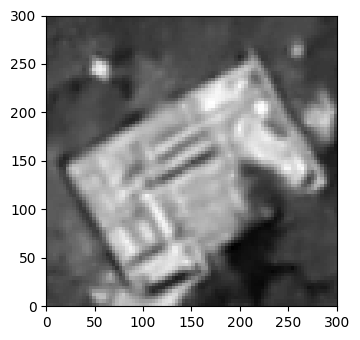

In [ ]:
# tresult
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = X[10]
fig, ax = plt.subplots()
im = ax.imshow(im, cmap='gray', extent=[0, 300, 0, 300])
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# extract the numpy arrays from the DataFrame
X = np.array(final_df['img'].tolist())
y = np.array(final_df['class'].tolist())

# split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# convert the data to the correct format for your model
# x_train = X_train.reshape(-1, 88, 88, 1)  # assuming the images are grayscale
# x_test = X_test.reshape(-1, 88, 88, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
# y_test.shape

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(7296, 88, 88)
(3128, 88, 88)
(7296,)
(3128,)


In [ ]:
y_train.shape
y_train[2345]
# type(y_train)

3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(88, 88, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

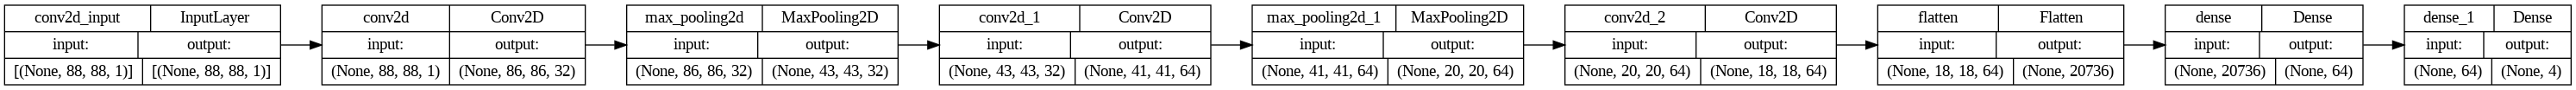

In [ ]:
# `rankdir='LR'` is to make the graph horizontal
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 86, 86, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 20736)             0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
228/228 [==============================] - 99s 428ms/step - loss: 0.9362 - accuracy: 0.5998 - val_loss: 0.9655 - val_accuracy: 0.5857
Epoch 2/10
228/228 [==============================] - 95s 416ms/step - loss: 0.8850 - accuracy: 0.6198 - val_loss: 0.9698 - val_accuracy: 0.5921
Epoch 3/10
228/228 [==============================] - 96s 421ms/step - loss: 0.8284 - accuracy: 0.6512 - val_loss: 0.9124 - val_accuracy: 0.6065
Epoch 4/10
228/228 [==============================] - 97s 427ms/step - loss: 0.7704 - accuracy: 0.6860 - val_loss: 0.9197 - val_accuracy: 0.6045
Epoch 5/10
228/228 [==============================] - 96s 422ms/step - loss: 0.7108 - accuracy: 0.7081 - val_loss: 0.9695 - val_accuracy: 0.5806
Epoch 6/10
228/228 [==============================] - 97s 424ms/step - loss: 0.6421 - accuracy: 0.7329 - val_loss: 1.0203 - val_accuracy: 0.5748
Epoch 7/10
228/228 [==============================] - 97s 427ms/step - loss: 0.5739 - accuracy: 0.7673 - val_loss: 1.0330 - val_ac

110/110 - 12s - loss: 2.5849 - accuracy: 0.5136 - 12s/epoch - 112ms/step


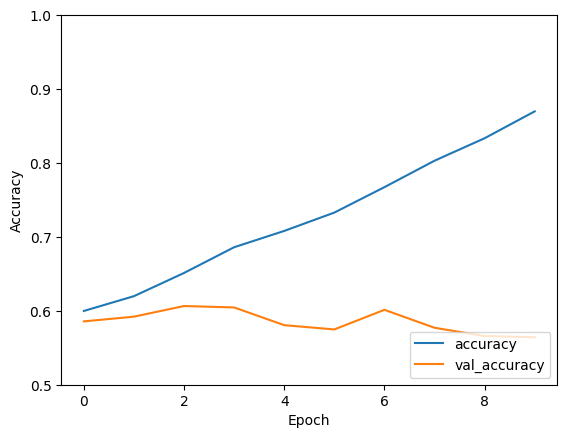

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [ ]:
test_acc

0.5135675668716431

In [ ]:
X.shape

(10424, 88, 88)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_rshp = X.reshape([X.shape[0], X.shape[1] * X.shape[2]])

scaler = StandardScaler()
X_rshp = scaler.fit_transform(X_rshp)

In [ ]:
X_train.shape
X_rshp.shape

(10424, 7744)

In [ ]:
X[0].shape

(88, 88)

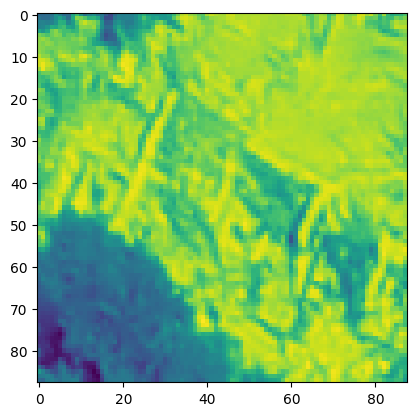

In [ ]:
c = plt.imshow(X[0])

In [ ]:
from sklearn.cluster import KMeans


# YOUR CODE HERE
n_clusters = 4
k_means_pp = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=0)
k_means_pp.fit(X_rshp)

KMeans(n_clusters=4, n_init=1, random_state=0)

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import homogeneity_score

kmeanspp_homog = homogeneity_score(y, k_means_pp.labels_)

print('K-means pp homogeneity score: %f' % kmeanspp_homog)
print('K-means pp inertia: %f' % k_means_pp.inertia_) 

K-means pp homogeneity score: 0.012854
K-means pp inertia: 62633607.714432


In [ ]:
from sklearn.decomposition import PCA

data_pca = PCA(n_components=2).fit_transform(X_rshp)

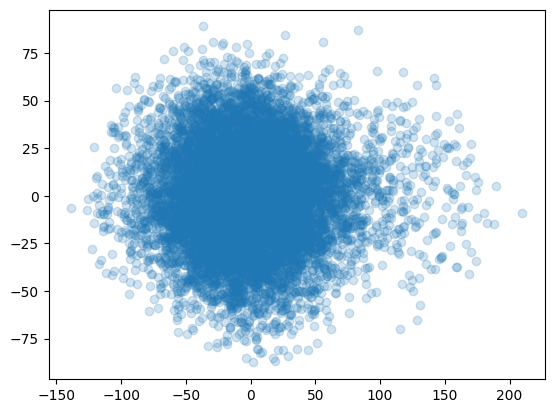

In [ ]:
plt.scatter(data_pca[:,0], data_pca[:,1], alpha=0.2)

Text(0.5, 1.0, 'K-means++ clusters')

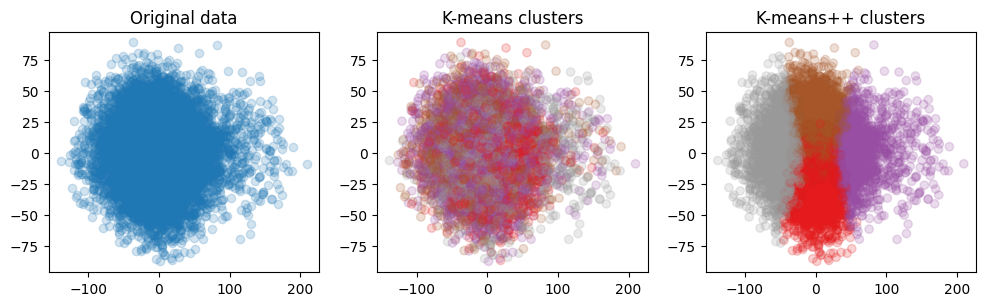

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(10,3))
fig.tight_layout()

ax[0].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2)
ax[0].set_title('Original data')

ax[1].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2, c=y, cmap='Set1')
ax[1].set_title('K-means clusters')

ax[2].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2, c=k_means_pp.labels_, cmap='Set1')
ax[2].set_title('K-means++ clusters')

In [ ]:
# YOUR CODE HERE

n_clusters = 4
k_means_pp_pca = KMeans(n_clusters=n_clusters, init='k-means++', n_init=1, random_state=0)
k_means_pp_pca.fit(data_pca)

KMeans(n_clusters=4, n_init=1, random_state=0)

Text(0.5, 1.0, 'K-means++ PCA clusters')

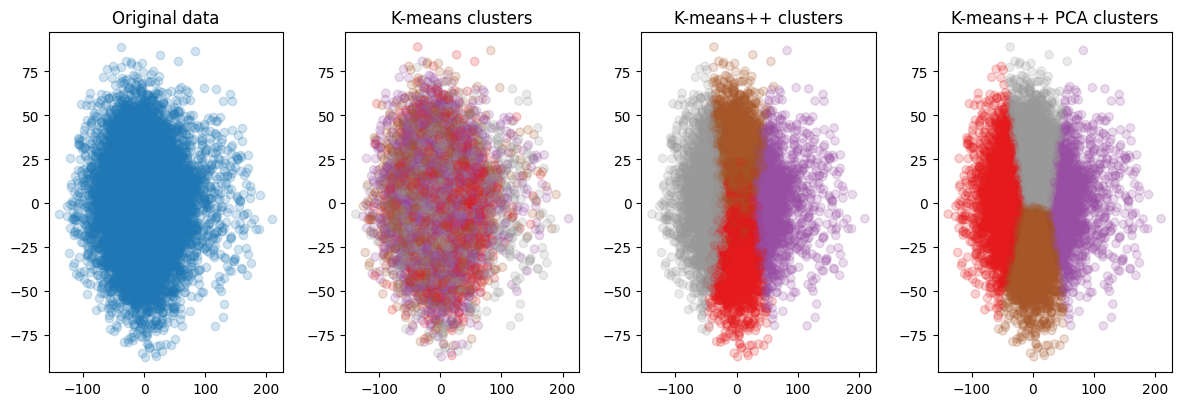

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(12,4))
fig.tight_layout()

ax[0].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2)
ax[0].set_title('Original data')

ax[1].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2, c=y, cmap='Set1')
ax[1].set_title('K-means clusters')

ax[2].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2, c=k_means_pp.labels_, cmap='Set1')
ax[2].set_title('K-means++ clusters')

# YOUR CODE HERE

ax[3].scatter(data_pca[:,0], data_pca[:,1], alpha=0.2, c=k_means_pp_pca.labels_, cmap='Set1')
ax[3].set_title('K-means++ PCA clusters')

In [ ]:
# YOUR CODE HERE

kmeanspp_pca_homog = homogeneity_score(y, k_means_pp_pca.labels_)
print('K-means plus + PCA homogeneity score: %f' % kmeanspp_pca_homog)
print('K-means inertia: %f' % k_means_pp_pca.inertia_) 

K-means plus + PCA homogeneity score: 0.013060
K-means inertia: 8575387.971932


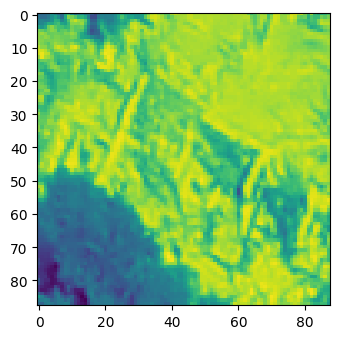

In [ ]:
plt.imshow(X[0])

In [ ]:
n_vis = 4
fig, axes = plt.subplots(ncols=n_vis, nrows=n_clusters, figsize=(11,11))

for i in range(n_vis):
    rand_inds = np.random.randint(0, k_means_pp_pca.labels_[k_means_pp_pca.labels_==i].shape[0], size=n_vis)
    for j in range(n_vis):
        axes[i,j].imshow(X[k_means_pp_pca.labels_==i][rand_inds[j]].astype(np.uint8), cmap='gray')
        axes[i,j].set_title(y[k_means_pp_pca.labels_==i][rand_inds[j]])
        axes[i,j].axis('off')
        
fig.tight_layout()

## SVM classifier with Kernel PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

X_rshp = X.reshape([X.shape[0], X.shape[1] * X.shape[2]])

scaler = StandardScaler()
X_rshp = scaler.fit_transform(X_rshp)

In [ ]:
X_rshp.shape

(10424, 7744)

In [ ]:
# split the data into training and testing sets
X_train_rshp, X_val_rshp, y_train, y_val = train_test_split(X_rshp, y, test_size=0.3, random_state=42)

print(X_train_rshp.shape)
print(X_val_rshp.shape)
print(y_train.shape)
print(y_val.shape)

(7296, 7744)
(3128, 7744)
(7296,)
(3128,)


In [ ]:
X_train_rshp, X_test_rshp, y_train, y_test = train_test_split(X_train_rshp, y_train, test_size=0.3, random_state=42)
print(X_train_rshp.shape)
print(X_test_rshp.shape)
print(y_train.shape)
print(y_test.shape)

(5107, 7744)
(2189, 7744)
(5107,)
(2189,)


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

n_components = 50

pca = PCA(n_components=n_components).fit(X_train_rshp)
total_var = []
sum = 0
for i in range(n_components):
    #print('Percentage of variance explained by PC {}: {}'.format(i+1, pca.explained_variance_ratio_[i]))
    sum += pca.explained_variance_ratio_[i]
    total_var.append(sum)
    
print('Total variance explained by 50 PCs: {}'.format(np.sum(pca.explained_variance_ratio_)))

Total variance explained by 50 PCs: 0.7998535815168177


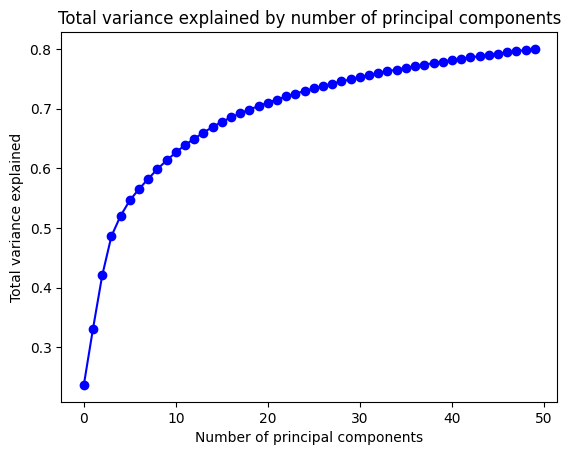

In [ ]:
plt.plot(range(n_components), total_var, 'bo-')
plt.xlabel('Number of principal components')
plt.ylabel('Total variance explained')
plt.title('Total variance explained by number of principal components')
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA

n_components = 15

kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True).fit(X_train_rshp)

In [ ]:
X_test

In [ ]:
X_train_kpca = kpca.transform(X_train_rshp)
X_val_kpca = kpca.transform(X_val_rshp)
X_test_kpca  = kpca.transform(X_test_rshp)

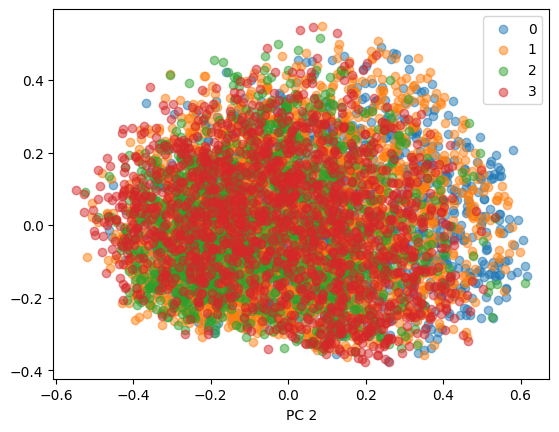

In [ ]:
fig, ax = plt.subplots(1)

for i in range(4):
    ax.scatter(X_train_kpca[y_train==i][:,0], X_train_kpca[y_train==i][:,1], label=i,alpha=0.5)
    
ax.set_xlabel('PC 1')
ax.set_xlabel('PC 2')
ax.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for the grid search
param_grid = {'C': [0.1, 5, 10, 100]}

# Perform a grid search over the parameter grid
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
clf.fit(X_train_kpca, y_train)

# Print the best value of C and its corresponding accuracy score
print(f'Best value of C: {clf.best_params_["C"]}')
y_pred = clf.predict(X_val_kpca)


Best value of C: 5


NameError: ignored

In [ ]:
acc = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {acc}')

y_pred_2 = clf.predict(X_test_kpca)
acc = accuracy_score(y_test, y_pred_2)
print(f'Testing Accuracy: {acc}')

Validation Accuracy: 0.40377237851662406
Testing Accuracy: 0.40566468707172226


In [ ]:
Y_predTrain = clf.predict(X_train_kpca)
trainY = accuracy_score(y_train, Y_predTrain)
print("Training Accuracy is ", trainY*100)

Training Accuracy is  59.976502839240254


In [ ]:
from sklearn.svm import SVC

clf = SVC(C=5, kernel='rbf')
clf = clf.fit(X_train_kpca, y_train)

In [ ]:
y_pred = clf.predict(X_val_kpca)
y_pred_2 = clf.predict(X_test_kpca)
acc = accuracy_score(y_test, y_pred_2)
print(f'Testing Accuracy: {acc}')

Testing Accuracy: 0.40566468707172226


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35       607
           1       0.41      0.58      0.48      1151
           2       0.31      0.14      0.19       632
           3       0.42      0.44      0.43       738

    accuracy                           0.40      3128
   macro avg       0.39      0.37      0.36      3128
weighted avg       0.39      0.40      0.39      3128



In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.40      0.27      0.32       435
           1       0.41      0.60      0.49       779
           2       0.31      0.14      0.19       460
           3       0.44      0.47      0.45       515

    accuracy                           0.41      2189
   macro avg       0.39      0.37      0.36      2189
weighted avg       0.39      0.41      0.38      2189



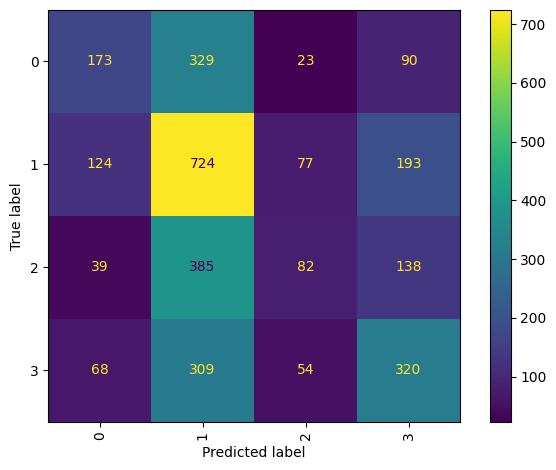

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    clf, X_val_kpca, y_val, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

## SVC without KernelPCA

In [ ]:

clf = SVC(C=5, kernel='rbf')
clf = clf.fit(X_train_rshp, y_train)

In [ ]:
y_pred = clf.predict(X_val_rshp)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.32      0.34       615
           1       0.42      0.57      0.48      1118
           2       0.31      0.21      0.25       644
           3       0.45      0.40      0.42       751

    accuracy                           0.40      3128
   macro avg       0.39      0.37      0.37      3128
weighted avg       0.39      0.40      0.39      3128



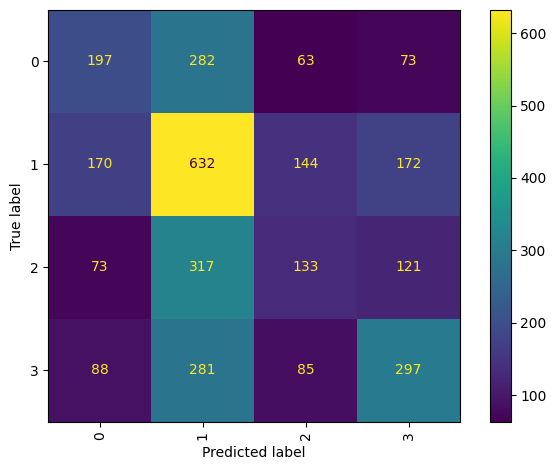

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_val_rshp, y_val, xticks_rotation="vertical"
)

plt.tight_layout()
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [ ]:
# Fit the model parameters using the training data
gnb = gnb.fit(X_train_kpca, y_train)

In [ ]:
# Predict the test set classes using the trained model
y_pred = gnb.predict(X_val_kpca)
y_pred_2 = gnb.predict(X_test_kpca)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE
testY = accuracy_score(y_val, y_pred)
print("Validation Accuracy is ",testY*100)
testY_2 = accuracy_score(y_test, y_pred_2)
print("Testing Accuracy is ",testY_2*100)


Validation Accuracy is  39.25831202046036
Testing Accuracy is  37.7341251713111


In [ ]:
# YOUR CODE HERE
Y_predTrain = gnb.predict(X_train_kpca)
trainY = accuracy_score(y_train, Y_predTrain)
print("Training Accuracy is ", trainY*100)

Training Accuracy is  39.90601135696104


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier on the reduced dataset
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_kpca, y_train)

# Predict on the test set and compute accuracy
y_pred = clf.predict(X_val_kpca)
acc = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {acc}')

# Predict on the test set and compute accuracy
y_pred_2 = clf.predict(X_test_kpca)
acc = accuracy_score(y_test, y_pred_2)
print(f'Testing Accuracy: {acc}')

Validation Accuracy: 0.3903452685421995
Testing Accuracy: 0.39195979899497485


In [ ]:
# Predict on the test set and compute accuracy
y_pred = clf.predict(X_train_kpca)
acc = accuracy_score(y_train, y_pred)
print(f'Training Accuracy: {acc}')

Training Accuracy: 1.0
